# Movie Data Analysis

## Overview

Microsoft wants to create a new movie studio and create original video content like the big film companies. To this end, they first want to understand how they can successfully enter the movie industry. I decided to change my focus on the profitability of movies in relation to movie studios, release time of the movie and the actual language of the movie.Some of the aspects of a movie I could investigate, will be the questions below:

* What month/ season is the most profit-making to release a movie?
* What are the most well-liked genre on foreign language movies?
* What production budgets and the famous movie studios.

## Datasets

* im.db
* born.movie_gross.csv.gz
* rt.movie_info.tsv.gz
* rt.reviews.tsv.gz
* tmbd.movies.csv.gz

## Import Libraries

In [38]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import sqlite3 

## Import Data and Create Tables

In [39]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [40]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


This does not include all of the CSVs! Make sure you open and explore some of the other ones.

In [41]:
csv_files = glob('./zippedData/*.csv.gz')
tsv_files = glob('./zippedData/*.tsv.gz')
files = csv_files + tsv_files
type(files)

list

In [42]:
#clean file name
#create dictionary of dataframes of each csv and tsv
files_dict = {}
for filename in files:
    if 'csv' in str(os.path.basename(filename)):
        filename_cleaned = os.path.basename(filename).replace(".csv.gz", "")\
        .replace(".", "_")
        filename_df = pd.read_csv(filename, compression='gzip', index_col=0)
        files_dict[filename_cleaned] = filename_df
    else:
        filename_cleaned = os.path.basename(filename).replace(".tsv.gz", "")\
        .replace(".", "_")
        filename_df = pd.read_csv\
        (filename, compression='gzip', delimiter ='\t', index_col=0, encoding ='ISO-8859-1')
        files_dict[filename_cleaned] = filename_df

In [43]:
files_dict.keys()

dict_keys(['bom_movie_gross', 'tn_movie_budgets', 'tmdb_movies', 'rt_movie_info', 'rt_reviews'])

In [7]:
files_dict['rt_movie_info'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [44]:
conn = sqlite3.connect("movies_db.sqlite")

In [45]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [46]:
for name, table in files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table rt_movie_info
Table 'rt_movie_info' already exists.
could not make table rt_reviews
Table 'rt_reviews' already exists.


## SQL DATA

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [11]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

In [47]:
import sqlite3

In [48]:
conn = sqlite3.connect("im.db")

In [49]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## Aspect I: What month/ season is the most profitable to release a movie?

## For Profit and Release Dates Exploratory Data Analysis

Will clean the date and add relevant columns by determining the profit of each movie, the month of release, ensuring the date types are correct, and remove duplicates.

In [50]:
budgets_and_release_dates_df = files_dict['tn_movie_budgets']

In [51]:
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [52]:
budgets_and_release_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [53]:
budgets_and_release_dates_df['release_date'] = pd.to_datetime\
                                (budgets_and_release_dates_df['release_date'])

In [54]:
budgets_and_release_dates_df[budgets_and_release_dates_df.columns[2:]] \
        = budgets_and_release_dates_df[budgets_and_release_dates_df.columns[2:]]\
        .apply(lambda x: x.str.replace('$',''))\
        .apply(lambda x: x.str.replace(',','')).astype(np.int64)

/tmp/ipykernel_471/843939371.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .apply(lambda x: x.str.replace('$',''))\


In [55]:
budgets_and_release_dates_df['movie_profit'] \
        = budgets_and_release_dates_df['worldwide_gross']\
        - budgets_and_release_dates_df['production_budget']

In [56]:
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [22]:
budgets_and_release_dates_df['release_month'] = \
        pd.DatetimeIndex(budgets_and_release_dates_df['release_date']).month

In [23]:
duplicate_budgets_and_release_dates_df = \
        budgets_and_release_dates_df[budgets_and_release_dates_df.duplicated()]

In [24]:
duplicate_budgets_and_release_dates_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,release_month
id,,,,,,,


In [57]:
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [26]:
budgets_and_release_dates_df['release_date'].min()

Timestamp('1915-02-08 00:00:00')

In [27]:
budgets_and_release_dates_df.shape

(5782, 7)

## Data Review

We will review the data using a SQL query to get a better sense of the scale of the profit numbers

In [28]:
cur = conn.cursor()

In [29]:
cur.execute("""SELECT movie_profit, release_month
            FROM budgets_release_dates
            WHERE release_date > 2000-01-01
            ORDER BY movie_profit DESC;""").fetchall()

[(2351345279, 12),
 (2008208395, 12),
 (1748134200, 4),
 (1747311220, 12),
 (1433854864, 6),
 (1328722794, 4),
 (1292935897, 5),
 (1216693157, 7),
 (1148258224, 2),
 (1135772799, 6),
 (1122469910, 11),
 (1099199706, 3),
 (1086336173, 7),
 (1072413963, 5),
 (1047403341, 12),
 (1042520711, 6),
 (1015392272, 5),
 (999721747, 12),
 (986894640, 12),
 (984846267, 4),
 (975812584, 6),
 (959727750, 6),
 (948061550, 3),
 (928790543, 6),
 (912044677, 5),
 (910526981, 11),
 (906914868, 6),
 (899216835, 7),
 (894039076, 6),
 (890069413, 5),
 (874496193, 12),
 (869429616, 3),
 (868879522, 6),
 (867008132, 5),
 (850047606, 11),
 (849102856, 12),
 (842429370, 5),
 (841215812, 7),
 (840699645, 12),
 (839985342, 11),
 (835431568, 11),
 (825491110, 3),
 (821215193, 6),
 (816996207, 7),
 (811750534, 7),
 (809439099, 7),
 (793076457, 7),
 (787854547, 4),
 (784765137, 7),
 (782465326, 6),
 (779225135, 11),
 (778210985, 12),
 (775598007, 5),
 (769701857, 7),
 (767003568, 12),
 (747099794, 11),
 (743025593, 

In [30]:
budgets_and_release_dates_df.groupby('release_month').mean()

,production_budget,domestic_gross,worldwide_gross,movie_profit
release_month,,,,
1,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
2,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
3,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
4,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
5,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08
6,4.309912e+07,6.582791e+07,1.425230e+08,9.942391e+07
7,4.254616e+07,6.072804e+07,1.409636e+08,9.841746e+07
8,2.555609e+07,3.216821e+07,6.097841e+07,3.542232e+07
9,2.181290e+07,2.314989e+07,4.669369e+07,2.488078e+07


In [31]:
cur.execute("""SELECT avg(movie_profit), release_month
            FROM budgets_release_dates
            GROUP BY release_month
            ORDER BY avg(movie_profit) DESC;""").fetchall()

[(115132808.4004914, 5),
 (99423910.9519833, 6),
 (98417458.35909091, 7),
 (93141569.2510288, 11),
 (68441565.30604027, 12),
 (49851292.36170213, 3),
 (43498106.821428575, 2),
 (36117428.171806164, 4),
 (35422316.85685484, 8),
 (29071903.781849913, 10),
 (25720334.109510086, 1),
 (24880784.866125762, 9)]

## Data Visualization

Plotting the data using a boxplot to show the profits for each month. We use a boxplot so that we can see the IQR for movie profits and how the vary from month to month. We will also remove the outliers but leave the whiskers to get a good sense of the full range of movie success of the month.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


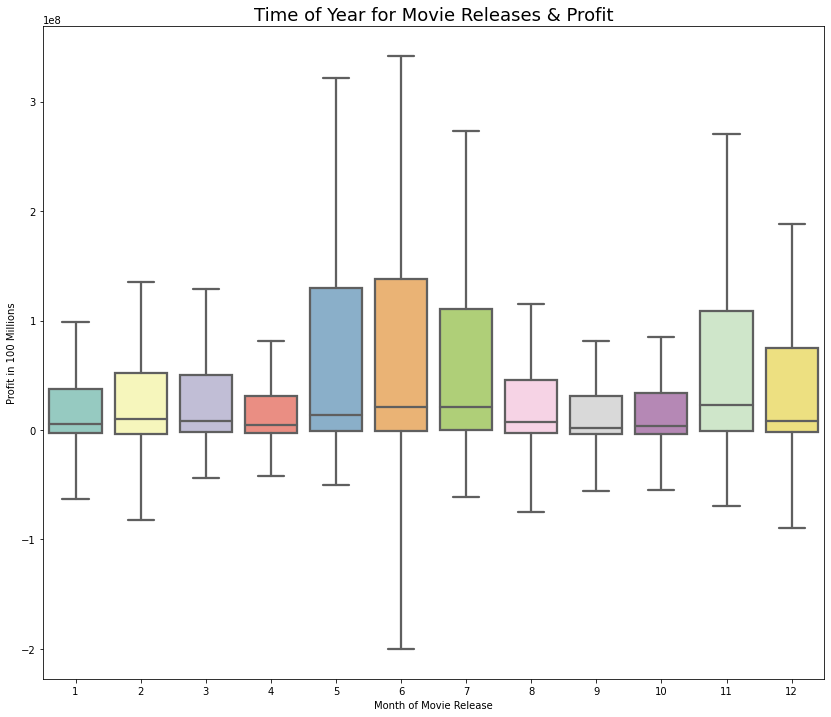

In [32]:
#create a boxplot using release month and profit
x = budgets_and_release_dates_df['release_month']
y = budgets_and_release_dates_df['movie_profit']
f, ax = plt.subplots(figsize=(14,12))
sns.set_style('darkgrid')
sns.set_context('talk') 
sns.boxplot(x, y, palette='Set3', showfliers=False)
plt.title('Time of Year for Movie Releases & Profit')
plt.ylabel('Profit in 100 Millions')
plt.xlabel('Month of Movie Release') 
plt.show()

## Findings

From the boxplot, there's dual seasonality of higher profits during the summer and at the end of the year. The highest profit in summer can be realized during the months of June and in November toward the winter months.

## Recommendations

Microsoft should take into account the seasonality of profits and target movies to be released in May or June to ensure a higher likelihood of it being a hit.

## Future Action

I should continue to track by genre what the best time is for a movie release, or examine the ROI for movies in certain genres.

## Aspect II : What are the most well-liked genre on foreign language movies?

Turning to the genre and market of movies, there has been an increase recognition and market towards non-English films over the last years. In the event Microsoft decides to pursue the independent or film-right acquisition at festivals, this analysis would help in building confidence on how to select a genre type and whether it would be profitable.

## For Non- English genres and popularity rating Explatory Data Analysis

In [58]:
files_dict.keys()

dict_keys(['bom_movie_gross', 'tn_movie_budgets', 'tmdb_movies', 'rt_movie_info', 'rt_reviews'])

In [59]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [60]:
movie_basics['genre_lst'] = movie_basics['genres'].str.split(',')

In [61]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_lst
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [66]:
#df_explode.head()

In [63]:
df_explode = movie_basics.explode('genre_lst')

In [64]:
df_explode['genre_lst'].value_counts()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genre_lst, dtype: int64

In [65]:
df_explode.groupby('genre_lst').mean()['runtime_minutes']

genre_lst
Action         100.019729
Adult           86.285714
Adventure       85.782404
Animation       80.674520
Biography       74.129960
Comedy          93.920165
Crime           95.508631
Documentary     72.107879
Drama           94.281372
Family          83.192047
Fantasy         91.918707
Game-Show      117.000000
History         78.756430
Horror          87.351383
Music           82.339474
Musical         95.423684
Mystery         93.233888
News            66.418635
Reality-TV      80.233333
Romance        100.219710
Sci-Fi          90.547855
Short           16.400000
Sport           80.939456
Talk-Show       86.736842
Thriller        94.351337
War             87.136697
Western        100.332474
Name: runtime_minutes, dtype: float64

## Data Review

In [67]:
non_EN_popularity_df = files_dict['tmdb_movies']

In [68]:
non_EN_popularity_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [69]:
non_EN_popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [70]:
non_en_movie_details_df = movie_basics.merge(non_EN_popularity_df,\
                                    left_on ='original_title',right_on='title',\
                                    how ='inner') 


In [71]:
non_en_movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21205 entries, 0 to 21204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           21205 non-null  object 
 1   primary_title      21205 non-null  object 
 2   original_title_x   21205 non-null  object 
 3   start_year         21205 non-null  int64  
 4   runtime_minutes    19426 non-null  float64
 5   genres             20881 non-null  object 
 6   genre_lst          20881 non-null  object 
 7   genre_ids          21205 non-null  object 
 8   id                 21205 non-null  int64  
 9   original_language  21205 non-null  object 
 10  original_title_y   21205 non-null  object 
 11  popularity         21205 non-null  float64
 12  release_date       21205 non-null  object 
 13  title              21205 non-null  object 
 14  vote_average       21205 non-null  float64
 15  vote_count         21205 non-null  int64  
dtypes: float64(3), int64(3

In [87]:
#non_en_movie_details_df = non_en_movie_details_df \
                        #(columns = ['runtime_minutes', 'genre_ids'])

In [81]:
non_en_movie_details_df = non_en_movie_details_df \
                        [non_en_movie_details_df['original_language'] != 'en']

In [82]:
non_en_movie_details_df = non_en_movie_details_df[non_en_movie_details_df\
                        ['vote_count'] >= 100]

In [83]:
non_en_movie_details_df = non_en_movie_details_df.drop_duplicates\
                        (subset = 'id', keep = 'first')

In [84]:
non_en_movie_details_df.shape

(148, 16)

In [85]:
non_en_movie_details_df['start_year'].min()

2010

In [86]:
non_en_movie_details_df['start_year'].max()

2020

In [ ]:
table_test.info()

In [89]:
table_test = movie_basics.merge(non_EN_popularity_df,\
                                    left_on ='original_title',right_on='title',\
                                    how ='inner') 

## Data Visualization

In [90]:
table_test = table_test.explode('genre_lst')

In [91]:
table_test.drop(table_test[table_test['original_language'] == 'en'].index, inplace = True)

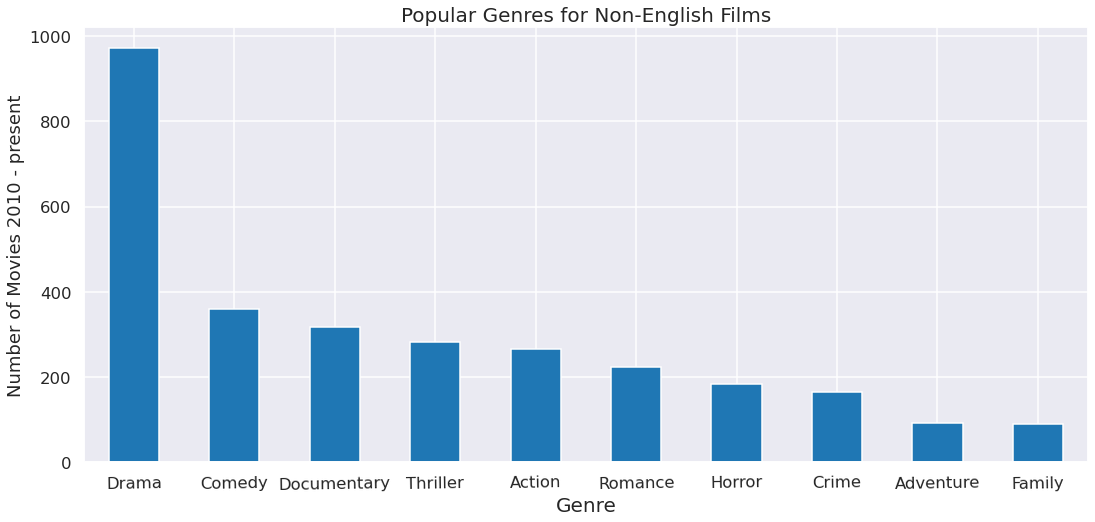

In [92]:
#plotting a bar chart of genre and count dictionary
table_test['genre_lst'].value_counts()[:10].plot(kind = 'bar', figsize=(18, 8))
sns.axes_style('darkgrid')
sns.set_context('talk')
plt.title('Popular Genres for Non-English Films', fontsize=20);
plt.ylabel('Number of Movies 2010 - present', fontsize=18);
plt.xlabel('Genre', fontsize=20);
plt.xticks(rotation=1);

In [93]:
table_test3 = table_test.drop(['start_year', 'runtime_minutes', 'id', 'popularity', 'vote_count'], axis=1)

In [95]:
#table_test.to_sql('non_en_movie_details', conn)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


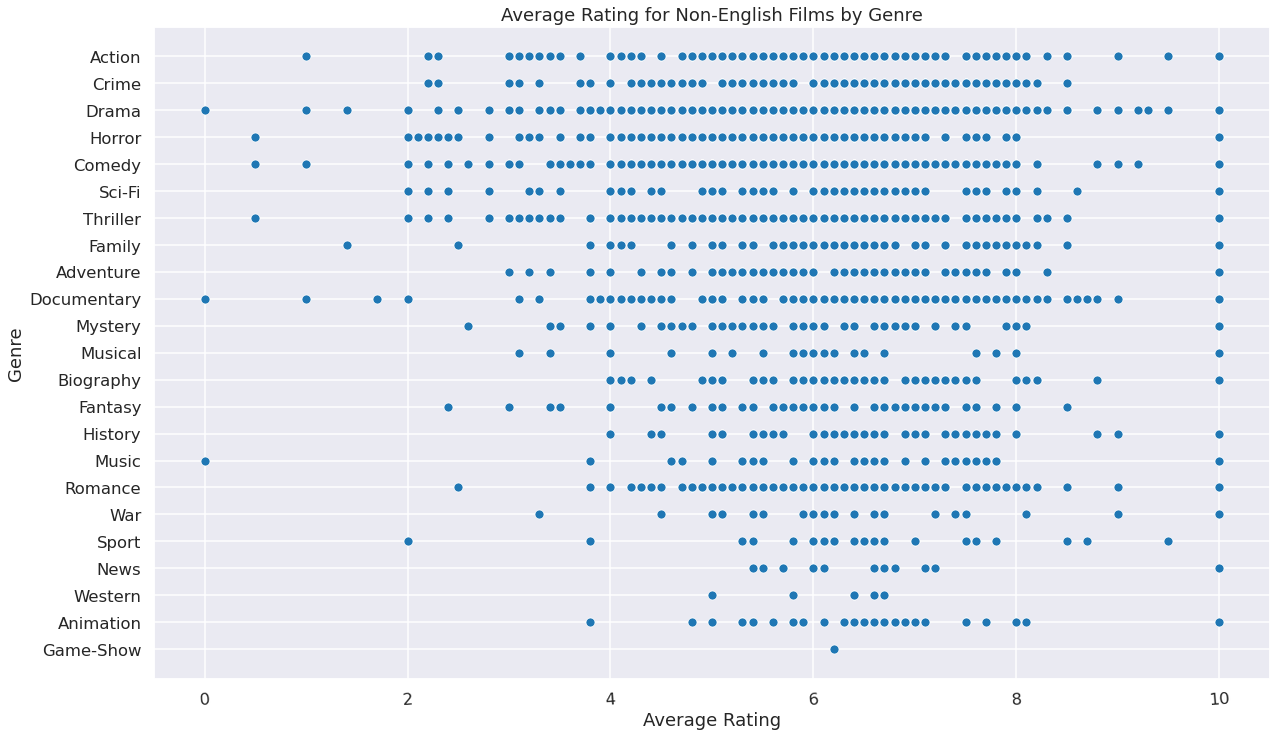

In [96]:
#plot scatterplot of average voter rating of each movie by genre
rating_x = table_test['vote_average']
rating_y = table_test['genre_lst']

f, ax = plt.subplots(figsize=(20,12))
sns.set_style('darkgrid')
sns.set_context('talk')
sns.scatterplot(rating_x, rating_y)
plt.title('Average Rating for Non-English Films by Genre')
plt.xticks(rotation=4)
plt.ylabel('Genre')
plt.xlabel('Average Rating')
plt.show()

In [97]:
cur = conn.cursor()

In [98]:
cur.execute("""SELECT genre_lst,
           AVG(vote_average) AS genre_average,
           COUNT(genre_lst)AS number_films
           FROM non_en_movie_details
           GROUP BY genre_lst
           ORDER BY AVG(vote_average) DESC
           LIMIT 20;""")
genre_df=pd.DataFrame(cur.fetchall())
genre_df.columns = [i[0] for i in cur.description]
genre_df

,genre_lst,genre_average,number_films
0,History,6.769388,49
1,News,6.615385,13
2,Documentary,6.457098,317
3,Biography,6.431818,88
4,Animation,6.393182,44
5,Music,6.368519,54
6,Sport,6.333333,36
7,None,6.309756,0
8,Crime,6.307831,166
9,Drama,6.287037,972


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


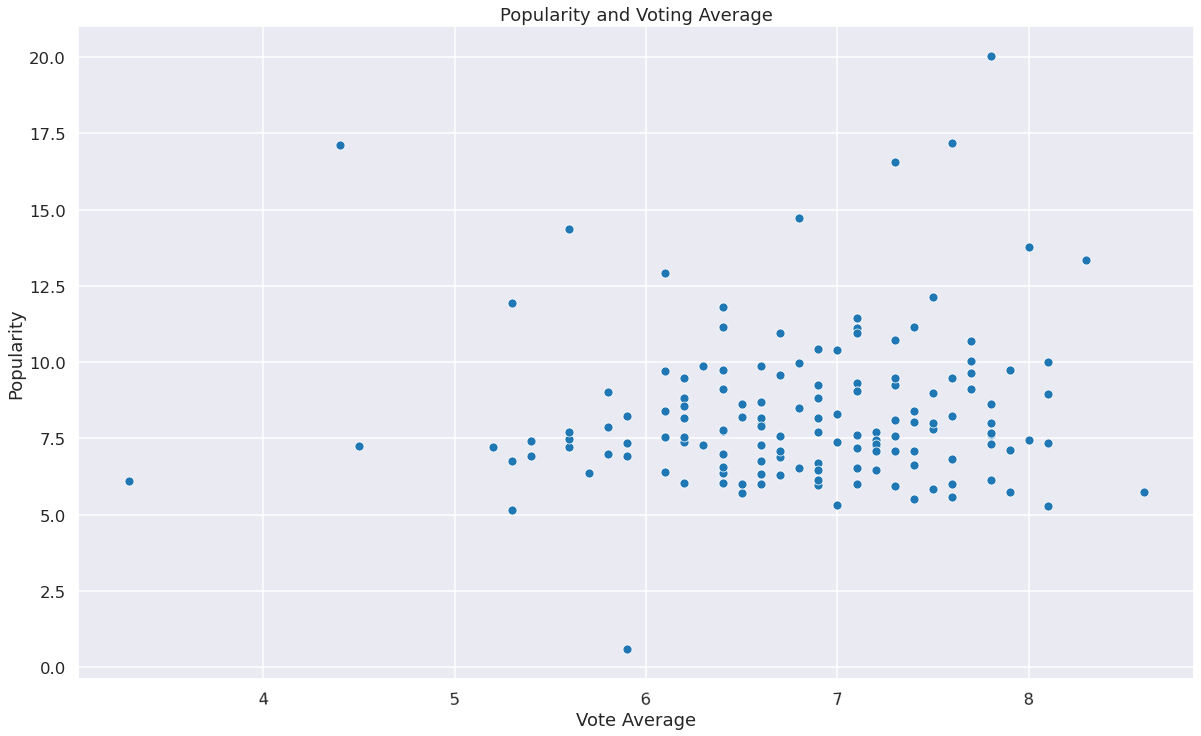

In [100]:
#since we have a separate column on 'popularity' in addition to voting, 
#plot the popularity against the vote average
#check correlation between vote average and popularity
popularity_and_voting_x = non_en_movie_details_df  ['vote_average']
popularity_and_voting_y  =   non_en_movie_details_df ['popularity']
f, ax = plt.subplots(figsize=(20,12))
sns.set_style('darkgrid')
sns.set_context('talk')
sns.scatterplot(popularity_and_voting_x,popularity_and_voting_y,)
plt.title('Popularity and Voting Average')
plt.xticks(rotation=4)
plt.ylabel('Popularity')
plt.xlabel('Vote Average')
plt.show()

In [101]:
non_en_movie_details_df.corr()

,start_year,runtime_minutes,id,popularity,vote_average,vote_count
start_year,1.000000,-0.054703,0.280687,0.024870,-0.106298,-0.123149
runtime_minutes,-0.054703,1.000000,0.033240,-0.152062,0.168227,-0.105931
id,0.280687,0.033240,1.000000,0.290735,-0.048454,-0.041259
popularity,0.024870,-0.152062,0.290735,1.000000,0.080619,0.457667
vote_average,-0.106298,0.168227,-0.048454,0.080619,1.000000,0.206017
vote_count,-0.123149,-0.105931,-0.041259,0.457667,0.206017,1.000000


## Findings

Non- English Drama and Comedy are likely to attract more viewers.

## Recommendations

If Microsoft Studio decides to go ahead with production and distribution of foreign films , drama and comedy would likely attact move viewers.

## Future Action

Exploring further what foreign language films are appealing to moviegoers ( and more profitable). We should also find additional sources to gauge moviegoer sentiment rather than the vore average and popularity from our dataset.

## Aspect 3: What production budgets and the famous movie studios.

In [102]:
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


Reviewing the Box Office Magic, Rotten Tomatoes tables and our existing dataframe from the previous question to see which has the longest data set on studio information. We would like to determine which studios are releasing the most movies, and would like to compare the production budgets of those studios.

In [104]:
rt_studios_df = files_dict['rt_movie_info']

In [105]:
rt_studios_df['studio'].value_counts()

Universal Pictures            35
Paramount Pictures            27
20th Century Fox              26
Sony Pictures Classics        22
Warner Bros. Pictures         21
                              ..
Orion Pictures Corporation     1
Factory 25                     1
A24 and DIRECTV                1
First Look Pictures            1
IDP Distribution               1
Name: studio, Length: 200, dtype: int64

In [106]:
bom_studios_df = files_dict['bom_movie_gross']

In [107]:
bom_studios_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [108]:
bom_studios_df.reset_index(inplace = True)

In [109]:
bom_studios_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [110]:
duplicate_bom_studios_df = bom_studios_df[bom_studios_df.duplicated()]

In [111]:
duplicate_bom_studios_df

,title,studio,domestic_gross,foreign_gross,year


In [112]:
bom_studios_df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

## Data Review

In [113]:
bom_studios_df['year'].min()

2010

In [114]:
bom_studios_df['year'].max()

2018

In [115]:
bom_studios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [116]:
top_studios_df = bom_studios_df['studio'].value_counts().reset_index()
top_studios_df.columns = ['studio', 'count']

In [117]:
top_studios_df = top_studios_df[top_studios_df['count'] >= 100]

In [118]:
bom_studios_df.reset_index(inplace = True)

In [119]:
bom_studios_df.index

RangeIndex(start=0, stop=3387, step=1)

In [120]:
studio_budget_details_df = pd.merge(bom_studios_df,\
                                    budgets_and_release_dates_df,\
                                    left_on='title', right_on='movie',\
                                    how = 'inner')

In [121]:
studio_budget_details_df

,index,title,studio,domestic_gross_x,foreign_gross,year,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,movie_profit
0,0,Toy Story 3,BV,415000000.0,652000000,2010,2010-06-18,Toy Story 3,200000000,415004880,1068879522,868879522
1,3,Inception,WB,292600000.0,535700000,2010,2010-07-16,Inception,160000000,292576195,835524642,675524642
2,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673
3,5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010-06-30,The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828
4,6,Iron Man 2,Par.,312400000.0,311500000,2010,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,3253,Gotti,VE,4300000.0,NaN,2018,2018-06-15,Gotti,10000000,4286367,6089100,-3910900
1243,3259,Ben is Back,RAtt.,3700000.0,NaN,2018,2018-12-07,Ben is Back,13000000,3703182,9633111,-3366889
1244,3271,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2018-02-02,Bilal: A New Breed of Hero,30000000,490973,648599,-29351401
1245,3279,Mandy,RLJ,1200000.0,NaN,2018,2018-09-14,Mandy,6000000,1214525,1427656,-4572344


In [122]:
studio_budget_year_df = studio_budget_details_df.groupby(['studio', 'year'],\
                        as_index = False)['production_budget'].sum()

In [123]:
studio_budget_year_df.head()

,studio,year,production_budget
0,3D,2010,5000000
1,A24,2013,7500000
2,A24,2014,34500000
3,A24,2015,36000000
4,A24,2016,15000000


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


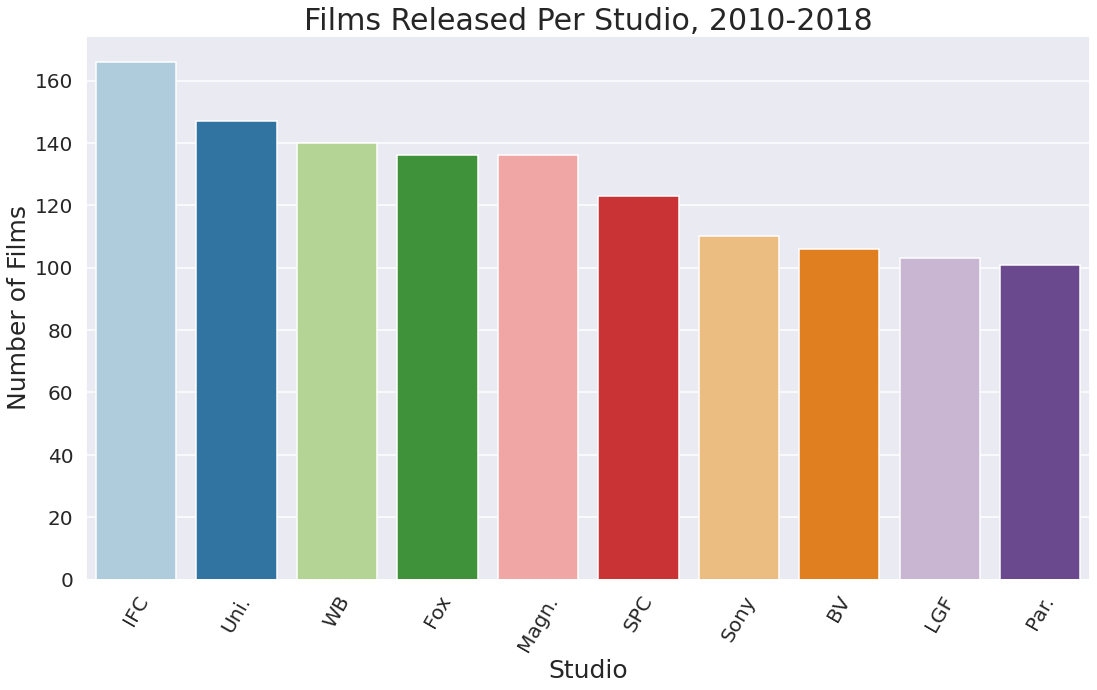

In [124]:
studios_x = top_studios_df['studio']
studios_y = top_studios_df['count']
f, ax = plt.subplots(figsize=(18,10))
sns.set_style('darkgrid')
sns.set_context('talk') 
sns.barplot(studios_x, studios_y, palette='Paired')
plt.title('Films Released Per Studio, 2010-2018', fontsize=30)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Films', fontsize = 25)
plt.xlabel('Studio', fontsize = 25) 
plt.show()

In [125]:
top_studios_df

,studio,count
0,IFC,166
1,Uni.,147
2,WB,140
3,Fox,136
4,Magn.,136
5,SPC,123
6,Sony,110
7,BV,106
8,LGF,103
9,Par.,101


In [126]:
studio_list = top_studios_df['studio'].tolist()

In [127]:
studio_list

['IFC', 'Uni.', 'WB', 'Fox', 'Magn.', 'SPC', 'Sony', 'BV', 'LGF', 'Par.']

In [128]:
studio_budget_year_df.studio.unique()

array(['3D', 'A24', 'ALP', 'ATO', 'Affirm', 'Alc', 'Amazon', 'Anch.',
       'Annapurna', 'App.', 'BBC', 'BG', 'BH Tilt', 'BSC', 'BST', 'BV',
       'CBS', 'CE', 'CJ', 'Cleopatra', 'Cohen', 'DR', 'Drft.', 'EC',
       'ELS', 'ENTMP', 'EOne', 'Eros', 'FCW', 'FD', 'First', 'Focus',
       'Fox', 'FoxS', 'Free', 'GK', 'Global Road', 'Gold.', 'GrtIndia',
       'IFC', 'IM', 'IVP', 'IW', 'Jan.', 'KE', 'Kino', 'LD', 'LG/S',
       'LGF', 'LGP', 'MBox', 'MGM', 'MNE', 'Magn.', 'Mira.', 'Mont.',
       'NFC', 'NM', 'Neon', 'OMNI/FSR', 'ORF', 'Orch.', 'Osci.', 'Over.',
       'P/DW', 'P4', 'PFR', 'PH', 'PNT', 'Par.', 'ParV', 'RAtt.', 'RLJ',
       'RTWC', 'Rela.', 'Relbig.', 'SGem', 'SMod', 'SPC', 'STX', 'Saban',
       'Scre.', 'Sony', 'Strand', 'Studio 8', 'Sum.', 'TFA', 'TriS',
       'Trib.', 'UTV', 'Uni.', 'VE', 'Viv.', 'W/Dim.', 'WB', 'WB (NL)',
       'WHE', 'Wein.', 'Yash'], dtype=object)

In [129]:
top_10_studios_df = studio_budget_year_df[studio_budget_year_df['studio']\
                                          .isin(studio_list)]

top_10_studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 30 to 278
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studio             84 non-null     object
 1   year               84 non-null     int64 
 2   production_budget  84 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [130]:
top_10_studios_df.studio.unique()

array(['BV', 'Fox', 'IFC', 'LGF', 'Magn.', 'Par.', 'SPC', 'Sony', 'Uni.',
       'WB'], dtype=object)

In [ ]:
#top_10_studios_df.to_sql('top_10_studios', conn)

In [131]:
cur.execute("""SELECT studio,
            AVG(production_budget) AS avg_yrly_budget
            FROM top_10_studios
            GROUP BY studio
            ORDER BY avg_yrly_budget DESC;""")
yrly_budget_df = pd.DataFrame(cur.fetchall())
yrly_budget_df.columns = [i[0] for i in cur.description]
yrly_budget_df

,studio,avg_yrly_budget
0,BV,1.050089e+09
1,WB,9.108556e+08
2,Fox,8.617222e+08
3,Uni.,7.330778e+08
4,Sony,5.611667e+08
5,Par.,5.300000e+08
6,LGF,2.299320e+08
7,SPC,4.437000e+07
8,IFC,3.875250e+07
9,Magn.,2.522000e+07


In [132]:
grouped_studios_df = top_10_studios_df.groupby('studio')

In [133]:
grouped_studios_df.head()

,studio,year,production_budget
30,BV,2010,775000000
31,BV,2011,1084600000
32,BV,2012,785000000
33,BV,2013,1058000000
34,BV,2014,937200000
77,Fox,2010,757500000
78,Fox,2011,702000000
79,Fox,2012,746500000
80,Fox,2013,1048000000
81,Fox,2014,1313000000


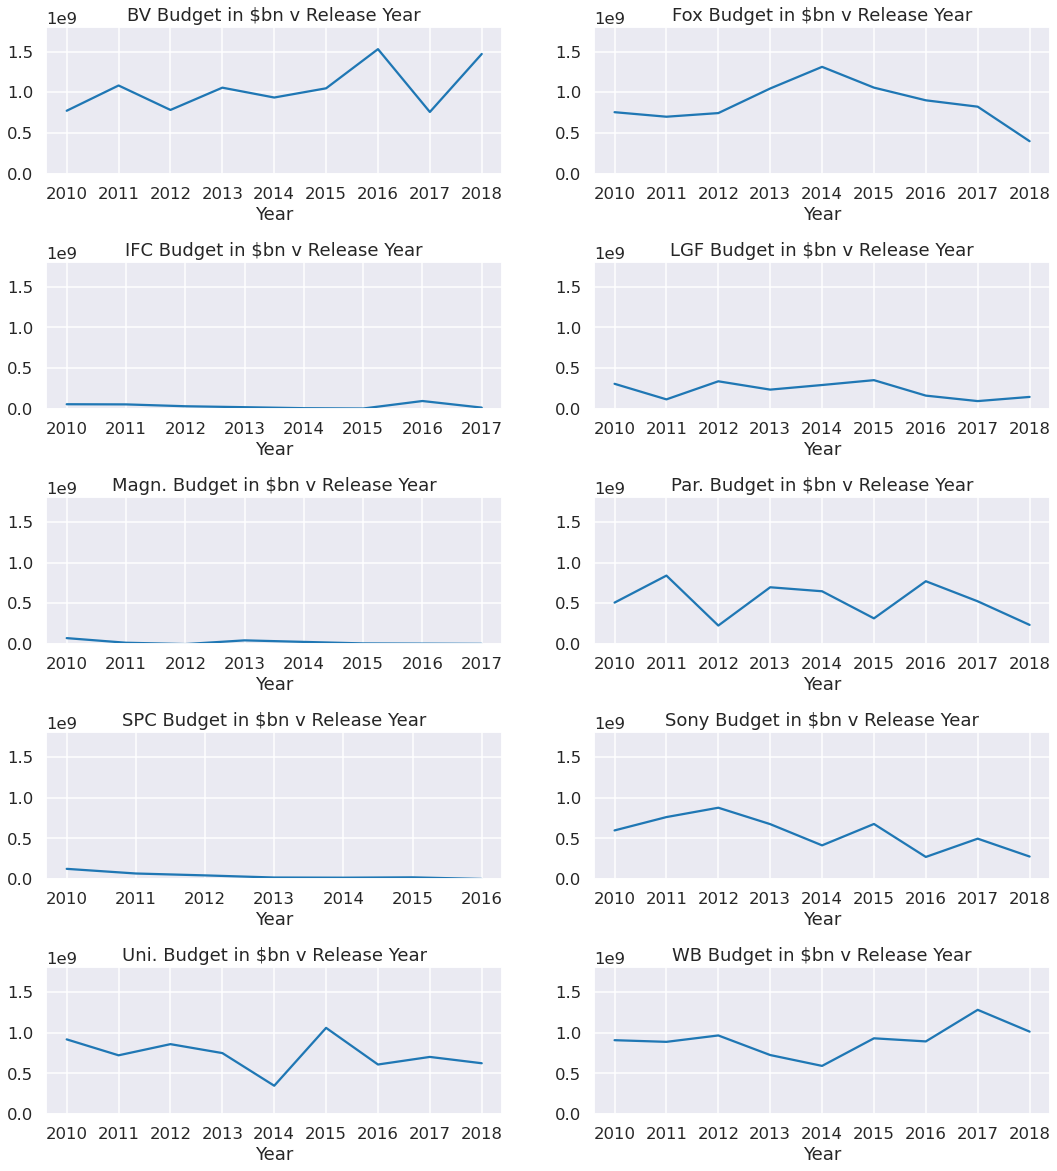

In [134]:
plt.figure(figsize=(18,20))
for index, (studio, production_budget) in enumerate(grouped_studios_df):
    ax = plt.subplot(5, 2, index+1)
    production_budget.plot(x='year', y='production_budget', ax=ax, legend=False)
    ax.set_title(studio + ' Budget in $bn v Release Year', loc='center')
    ax.set_xlabel('Year')
    ax.set_ylim(0, 1800000000)
plt.subplots_adjust(hspace = .6)

## Findings

The major film studios,(Warner Bros, Universal, Paramount, Fox and BV) as presumed, regularly has the highest annual production budgets (of approx. $1bn) than smaller independent distributors ( such as Sony Pictures Classic, Magnolia Studios and IFC) that acquire and distributed films

## Recommendations

Microsoft should consider the prospect of attaching its name to film acquisition and distribution rather than original production. As these lower budget movies still made it to top 10 together with the major film, it might be an appropriate model to enter the industry.

## Future Action

In order to get a sense of possibility, we will need to gauge the actual profitability of the acquisition and distribution model as compared to original production model.

## Conclusion

From the above analysis, I can conclude by summarizing our findings and recommend the following:

I recommend launching into the movie industry through an acquisition/distribution model as more top movies can be produced at a lower budget than producing an original movie as major film studios do.
Although there is wide variety of popular genre in foreign language film, I recommend choosing Drama or Comedy genre if the business decides to go with a foreign language film production or distribution.
I would recommend planning for movie releases towards the summer or at the end of the year. It is important to point out that the month of June has recorded both huge profits and huge losses too.

In [ ]:
conn.close()